In [5]:
import docx

In [62]:
#https://stackoverflow.com/questions/29309085/read-docx-files-via-python

In [63]:
doc = docx.Document('2020031115_00 Entrevista Balbina Sada RESIDENTE F1.docx')  # Creating word reader object.
data = ""
fullText = []
for para in doc.paragraphs:
    fullText.append(para.text)
    data = '\n'.join(fullText)


In [64]:
with open('transcribed/vero.txt', 'r') as myfile:
    text = myfile.read()

In [10]:
import nltk
from nltk.corpus import stopwords
es_stopwords =  set(stopwords.words('spanish'))

In [11]:
es_stopwords = es_stopwords.union(set(['cómo', 'qué']))

In [12]:
text_without_stop = ' '.join([word.lower() for word in text.split() if word.lower() not in es_stopwords])

In [15]:
#https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.ibm.com%2Fblogs%2Fbusiness-analytics%2Fwp-content%2Fuploads%2F2018%2F01%2FScreen-Shot-2017-12-20-at-11.01.27-AM-1024x765.png&imgrefurl=https%3A%2F%2Fwww.ibm.com%2Fblogs%2Fbusiness-analytics%2Fsocial-media-analysis-customer-sentiment%2F&tbnid=6AaTrI7OM-bHgM&vet=12ahUKEwi7zs6Lv63oAhUQOKwKHdMMBuUQMygAegUIARDTAQ..i&docid=OA9ZRHSqXqVKRM&w=1024&h=765&q=sentiment%20analysis%20ibm%20topic%20network&ved=2ahUKEwi7zs6Lv63oAhUQOKwKHdMMBuUQMygAegUIARDTAQ

In [16]:
import pandas as pd

In [17]:
from googletrans import Translator
translator = Translator()

In [18]:
text_english = translator.translate(text, src='spanish', dest='english').text

In [19]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


In [20]:
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, RelationsOptions, EmotionOptions, SentimentOptions

In [21]:
authenticator = IAMAuthenticator('api-key')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

In [65]:
natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')

response = natural_language_understanding.analyze(
    text=data,
    features=Features(entities=EntitiesOptions(),
                      keywords=KeywordsOptions(),
                      relations= RelationsOptions(),
                      emotion = EmotionOptions(),
                      sentiment = SentimentOptions()
                    )).get_result()

In [23]:
natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')


In [24]:
def sentiment_word_analysis(word):
    response = natural_language_understanding.analyze(
        text=word,
        features=Features(sentiment = SentimentOptions()
                        )).get_result()

    return response['sentiment']['document']['score']

In [25]:
split_text = text_without_stop.split()
sentiments =  []
sentences = []
for i in range(0, 410, 5):
    sentence = ' '.join(split_text[i: i+5])
    try:
        sentiments.append(sentiment_word_analysis(sentence))
        sentences.append(sentence)
        print(i)
    except:
        None


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105


ERROR:root:unsupported text language: rm
Traceback (most recent call last):
  File "/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: unsupported text language: rm, Code: 400 , X-global-transaction-id: 582a31dd9288634914c31793da36b755


115
120
125
130
135
140
145
150
155
160
165
170
175
180


ERROR:root:invalid request: content is empty
Traceback (most recent call last):
  File "/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: invalid request: content is empty, Code: 400 , X-global-transaction-id: 2a1a4ff237b06745ccfcc3877a1e08ae


185


ERROR:root:invalid request: content is empty
Traceback (most recent call last):
  File "/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: invalid request: content is empty, Code: 400 , X-global-transaction-id: 7099d363b42a6cea091c4acf7c8c58a1
ERROR:root:invalid request: content is empty
Traceback (most recent call last):
  File "/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: invalid request: content is empty, Code: 400 , X-global-transaction-id: 4370817886c7f8b6b2b99d5ae0231a70
ERROR:root:invalid request: content is empty
Traceback (most recent call last):
  File "/Users/ricalanis/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk

In [26]:
%matplotlib inline

In [27]:
sentiment_sentence = pd.DataFrame(sentiments)

In [28]:
sentiment_sentence['sentences'] = sentences

In [29]:
positive_words = ' '.join(list(sentiment_sentence[sentiment_sentence[0]>0.5]['sentences']))

In [30]:
negative_words = ' '.join(list(sentiment_sentence[sentiment_sentence[0]<-0.5]['sentences']))

In [32]:
import matplotlib.pyplot as plt

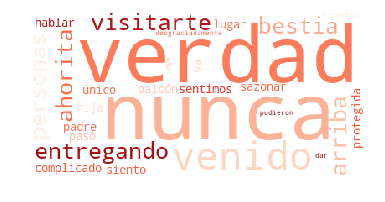

In [61]:
from wordcloud import WordCloud
text = negative_words
wordcloud = WordCloud(background_color="white", colormap="Reds_r"
                      ).generate(negative_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

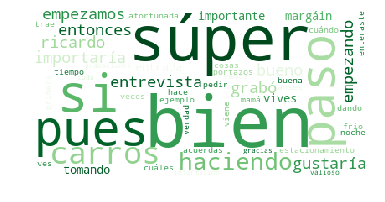

In [60]:
from wordcloud import WordCloud
text = positive_words
wordcloud = WordCloud(background_color="white", colormap="Greens_r"
                      ).generate(positive_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

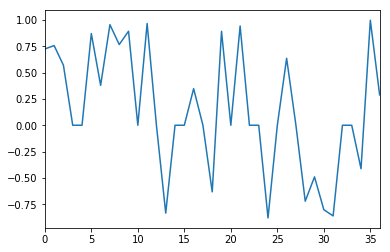

In [35]:
pd.DataFrame(sentiments)[0].plot()

In [46]:

from googletrans import Translator
translator = Translator()
text_english = translator.translate(text_without_stop, src='es', dest='en').text

In [66]:

natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')

response = natural_language_understanding.analyze(
    text=text_english,
    features=Features(entities=EntitiesOptions(),
                      keywords=KeywordsOptions(),
                      relations= RelationsOptions(),
                      emotion = EmotionOptions(),
                      sentiment = SentimentOptions()
                    )).get_result()

In [55]:
radar = [response['emotion']['document']['emotion'][key] for key in response['emotion']['document']['emotion']]

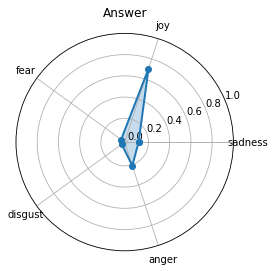

In [57]:
import matplotlib.pyplot as plt
import numpy as np

labels=['sadness', 'joy', 'fear', 'disgust', 'anger']
markers = [0, 0.2, 0.4, 0.6, 0.8, 1]
str_markers = ["0", "0.2", "0.4", "0.6", "0.8", "1"]

def make_radar_chart(name, stats, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):

    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)

    return plt.show()

make_radar_chart("Answer", radar) # example